<a href="https://colab.research.google.com/github/fdavenport/CIVE480A6-climate-change-impacts/blob/main/homework/Homework4_CIVE480A6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## CIVE480A6 Homework 4

**Due:** Thursday, October 31, 2024 at 9:00am


**Objectives:**
The goal of this homework is to practice different ways of analyzing extreme climate and weather events, including extreme fire weather, extreme precipitation and floods, and extreme hurricane winds.
   
**Total points for Homework 4: 13 pts**
*   Correct answers to Python problems: 9 pts
*   Answers to discussion questions: 4 pts

**Reminder:** You can work together on the assigment, but answers must be your own work.

To turn in your assignment, first open the notebook in Colab. Go under "File -> Save a copy to Drive" to save your own copy of this notebook. Now, you can edit the notebook and save your changes to your Google Drive as you work. Once you are done with your assignment and are ready to turn it in, go to "File -> Download -> Download .ipynb". To submit the assignment, upload the .ipynb file to the assignment in Canvas.

In [ ]:
## import libraries you will need for the assignment
import numpy as np
import pandas as pd
import math

from scipy.stats import genextreme
from scipy import stats

import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

## Problem 1 - Extreme Fire Weather

Climate scientists often use at a metric called the [Canadian Forest Fire Weather Index](https://cwfis.cfs.nrcan.gc.ca/background/summary/fwi) or "FWI" to understand how wildfire risk is changing. The FWI for a given day is calculated based on the temperature, relative humidity of the atmosphere near the ground, the wind speed, and the amount of recent precipitation.

<img src="https://raw.githubusercontent.com/fdavenport/CIVE480A6-climate-change-impacts/main/homework/img/fwi.png" width="400">

It is very hard to predict when exactly a wildfire will occur, because wildfire ignition is caused by somewhat random occurrences of lightning or human activity. However, if a fire starts when the Fire Weather Index is high, these conditions mean the fire is much more likely to grow quickly and spread. For this reason, FWI is a pretty good indicator of how wildfire risk has changed over time.

For this assignment, you will look at historical FWI values near Boulder, CO. This data covers 1980-2018, and the paper describing the original data can be found [here](https://www.nature.com/articles/s41597-020-0554-z). I've uploaded the data for Boulder, CO to the course github at this link:


In [ ]:
boulder_fwi_url = "https://raw.githubusercontent.com/fdavenport/CIVE480A6-climate-change-impacts/refs/heads/main/homework/data/boulder_fire_weather_index.csv"

**1a)** We will consider the threshold for extreme fire weather to be the top 0.5% of fire weather conditions (in other words, the 99.5th percentile). Read in the data and calculate the threshold for extreme fire weather.

In [ ]:
# add code here

**1b)** Now, we will look at the frequency of extreme fire weather days (those above the 99.5th percentile) in each year of the data. Use the following code, adding lines where necessary, to calculate this.

In [ ]:
annual_freq = pd.DataFrame(columns = ["year", "extreme_fwi_days"], index = range(39))

for i, yr in enumerate(range(1980, 2019)):
  annual_freq.loc[i, "year"] = yr #save the year in the summary table

  # add code to create a subset of the fwi data for the current year

  # add code to check how many days exceeded the 95th percentile



Print out the number of extreme fire weather days in 1980 and 2018:

In [ ]:
# add code here

**1c)** Create a time series plot showing the number of extreme fire weather days in each year

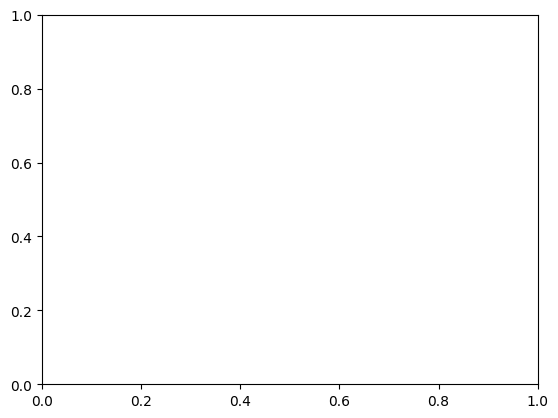

In [ ]:
fig, ax = plt.subplots()


# remember to label your figure

**1d)** Calculate the average number of extreme FWI days per year between 1980-1999 and between 2000-2018.

In [ ]:
# add code here

**1e)** Based on this, how much more likely were extreme FWI days in the later period (2000-2018) compared to the early period (1980-1999)?

In [ ]:
# add code here

**1f)** What year had the maximum number of extreme FWI days? How many days occurred in that year?  

In [ ]:
# add code here

**1g)** It turns out that there was a notable fire that occurred near Boulder, CO in the year from 1f. Find and read some information about the fire. Describe the conditions that led to the fire and its spread. Based on your research, was extreme fire weather a contributor?


*add answer here*

## Problem 2 - 100-Year Storms and 100-Year Floods

For this problem, you will analyze historical precipitation and historical streamflow data to calculate a 100-Year storm event and the 100-Year flood event within the Cache la Poudre watershed near Fort Collins. As we've discussed in class, a 100-year storm does not necessarily lead to a 100-year flood. For this reason, we will analyze both storms and floods, rather than just one or the other.

**2a)** We will analyze precipitation data from the Fort Collins weather station. The data is available online through the [Colorado Climate Center](https://climate.colostate.edu/data_access_new.html) at CSU. I have already calculated the wettest day in each year from 1960 through 2024 for you to analyze, and stored the data on the github here:

In [ ]:
ftc_data_url = "https://raw.githubusercontent.com/fdavenport/CIVE480A6-climate-change-impacts/refs/heads/main/homework/data/ft_collins_annual_max_P.csv"

Read in the data, and use the genextreme.fit() function to fit a GEV distribution to the data. Report the scale, location, and shape parameters.

In [ ]:
# add code here
# use as many code blocks as needed

**2b)** Make a figure showing the GEV distribution you calculated in 2a. Add a histogram of the actual data (remember to use density=True so the vertical scales line up).

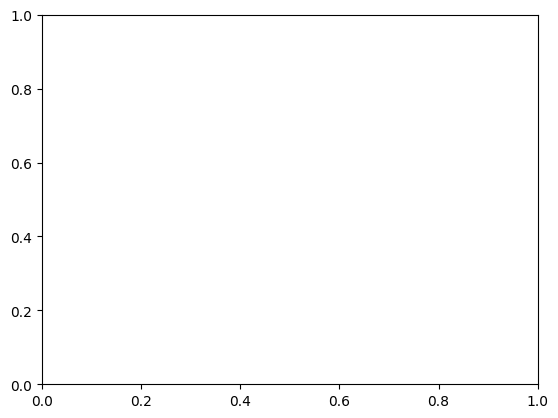

In [ ]:
fig, ax = plt.subplots()

x = np.arange(0.5, 5.5, 0.25) ## plot the distribution over precip values ranging from 0.5 to 5.5 inches

## add plotting code here



## remember to label your figure

**2c)** Create a figure showing the magnitude of different events vs. the return period for the return periods specified below.

Use the calc_empirical_return_level() function to calculate the empirical return period for each of the data points and add them to the figure (see notebook from class as an example). The empirical return level refers to how frequently different values in our data were exceeded within the period of record.

For example, if we have 65 years of data, the most extreme event in our data has an empirical return period of 65 years because it only occurred once in 65 years. The second most extreme event has an empirical return level of 32.5 years because it was exceeded twice in 65 years.


In [ ]:
return_periods = np.array([1.01, 1.02, 1.05, 1.1, 1.5, 2, 5, 10, 20, 30, 40, 50, 100, 200, 500, 1000])

In [ ]:
# run this code cell

def calc_empirical_return_level(data):
    """
    Compute empirical return level
    """
    df = pd.DataFrame(index=np.arange(data.size))
    # sort the data
    df["sorted_value"] = np.sort(data)[::-1]
    # rank via scipy instead to deal with duplicate values
    df["ranked_value"] = np.sort(stats.rankdata(-data))
    # find exceedence probability
    n = data.size
    df["exceedance"] = df["ranked_value"] / (n + 1)
    # find return period
    df["return_period"] = 1 / df["exceedance"]

    df = df[::-1]

    return df

In [ ]:
## calculate empirical return periods for your data

empirical_rp = calc_empirical_return_level() # add your data variable inside the function

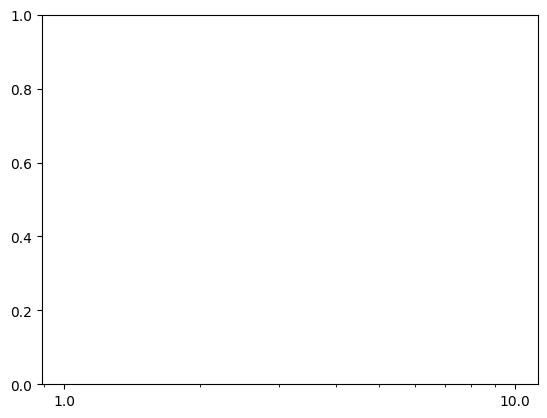

In [ ]:
## create a figure showing the event size vs. return period

fig, ax = plt.subplots()

## add plotting code here


ax.scatter(empirical_rp.return_period, empirical_rp.sorted_value) # this line of code will add the data points to the plot

## remember to add axis labels, title, and legend


## this code formats the x-axis labels in log scale
ax.set_xscale("log")
ax.xaxis.set_major_formatter(mticker.ScalarFormatter())
ax.ticklabel_format(style='plain', axis='x')

**2d) Discussion:** How well does the curve match the data?

*add answer here*

**2e)** What is the 50-year, 100-year, and 500-year storm event?  

In [ ]:
## add code here



As we've discussed in class, climate change is leading to more extreme precipitation. **This means that the 100-year event we calculate from historical data may not be accurate to assess future risk.**

We know from the Clausius-Clapeyron equation that warmer air can hold more water vapor. For example, a 1C increase in temperature leads to about a 6.6% increase in the amount of water vapor. Research has shown that we should expect extreme precipitation to increase by at least the same amount (some research suggests that extreme precipitation will increase at an even faster rate than what the Clausius-Clapeyron equation predicts). Either way, the Clausius-Clapeyron equation gives a good lower bound for future extreme precipitation changes. Based on this reasoning, we can calculate what the 50-year, 100-year, and 500-year events would look like under different levels of global warming.



**2f)** The calc_water_vapor_change() function below calculates the percent change in water vapor associated with a certain amount of global warming (in degrees celsius). Use this function to calculate the percent increase in atmospheric water vapor expected by 2100 under [three different global warming scenarios](https://www.carbonbrief.org/explainer-how-shared-socioeconomic-pathways-explore-future-climate-change/):

*   SSP1-2.6: 1.8C of warming by 2100
*   SSP2-4.5: 2.7C of warming by 2100
*   SSP5-8.5: 4.4C of warming by 2100


In [ ]:
def calc_water_vapor_change(temp_change):
  ''' temp_change = change in temperature in deg C
  function returns the percent change in saturation vapor pressure '''

  t_old = 13 # assumes historical global temp is 13C
  t_new = t_old+temp_change
  es_old = 0.61078*math.exp((17.27*t_old)/(t_old+237.3))
  es_new = 0.61078*math.exp((17.27*t_new)/(t_new+237.3))
  return (t_new - t_old)/t_old*100

In [ ]:
# calculate expected change in atmospheric water vapor pressure for the different future climate scenarios above



**2g)** Multiply your 50-year, 100-year, and 500-year storm events by these values to calculate the 50-year, 100-year, and 500-year storm values under different climate change scenarios:


In [ ]:
# add code here


**2h)** Now, you will analyze historical streamflow data for the [USGS Streamgage #06752260 for the Cache La Poudre River](https://nwis.waterdata.usgs.gov/co/nwis/inventory/?site_no=06752260&agency_cd=USGS) in Fort Collins. Conveniently, the USGS already calculates the annual maximum streamflow (in cubic feet per second) in each water year to make it easy to perform flood frequency analysis. The data is uploaded to the github here:

In [ ]:
poudre_data_url =  "https://raw.githubusercontent.com/fdavenport/CIVE480A6-climate-change-impacts/refs/heads/main/homework/data/poudre_peak_flows.csv"

Read in the data, and fit a GEV distribution. Report the shape, location, and scale parameters:

In [ ]:
# add code here

**2i)** Make a figure showing the GEV distribution you calculated in 2h. Add a histogram of the actual data (remember to use density=True so the vertical scales line up).

In [ ]:
fig, ax = plt.subplots()

x = np.arange(0, 100, 1) ## plot the distribution over windspeed values ranging from 0 to over 100m/s

## add plotting code here


## remember to label your figure

**2j)** What is the 100-year, 200-year, 500-year and 1000-year event?

In [ ]:
# add code here

**2k)** Because there isn't a direct correspondence between the 100-year storm and the 100-year flood, we can't assume that the 100-year flood will change by the same percentages. One way we could plan for more extreme floods in the future is to design for a higher return period event (such as the 200-year, 500-year, or 1000-year flood) instead of the 100-year flood.

To put this in perspective with changes in extreme precipitation, how much of an percent increase are the 200-year, 500-year, and 1000-year flood events compared to the 100-year flood event?

In [ ]:
# add code here

**2l) Discussion:** Theoretically, we could design infrastructure to withstand the most extreme events imaginable (something like the 10,000 year event or even greater). Infrastructure built to these standards would likely be quite resilient to climate change. However, think back to earlier in the semester when we discussed cost-benefit analyses of climate adaptation. What might be some downsides over preparing for events that have a very very low probability of occurrence?

*add your answer here*

## Problem 3 - Extreme Hurricane Winds

For this problem, you will analyze hurricane wind data for Mobile, Alabama. The data for this homework problem comes from research conducted by [Professor Yanlin Guo](https://www.engr.colostate.edu/~yanlin/) and her graduate students in the CEE Department at CSU.

The hurricane wind data was created by computer models that simulate how hurricane wind speeds in Mobile, AL will change with climate change. There are two simulations - one that models hurricane winds in the present climate (Year 2015), and one that models hurricane wind speeds in Year 2100 assuming the future climate scenario "Shared Socioeconomic Pathway 2-4.5" (SSP2-4.5). As we saw in problem 2, SSP2-4.5 is a "middle of the road" future climate scenario with about 2.7C of global warming by 2100.

There is one data file for each simulation:

*   hurricane_winds_2015.csv
*   hurricane_winds_2100.csv

Each data point in the file is the annual maximum hurricane wind speed (in m/s) at the center of Mobile, AL. Each simulation was conducted for 20,000 years. However, not every year has a hurricane, so there are only about ~9,000 years with data for each file. The data files are stored at the following urls:


In [ ]:
hurricane_wind_2015_url = "https://raw.githubusercontent.com/fdavenport/CIVE480A6-climate-change-impacts/refs/heads/main/homework/data/hurricane_winds_2015_Mobile-AL.csv"
hurricane_wind_2100_url = "https://raw.githubusercontent.com/fdavenport/CIVE480A6-climate-change-impacts/refs/heads/main/homework/data/hurricane_winds_2100_Mobile-AL.csv"

In [ ]:
## read in the data


**3a)** Add code to create two side by side histograms of the annual maximum wind speed in Mobile, AL. On the left, show the histogram for the simulation under the present (Year 2015) climate, and on the right show the histogram for the simulation under the Year 2100 climate.

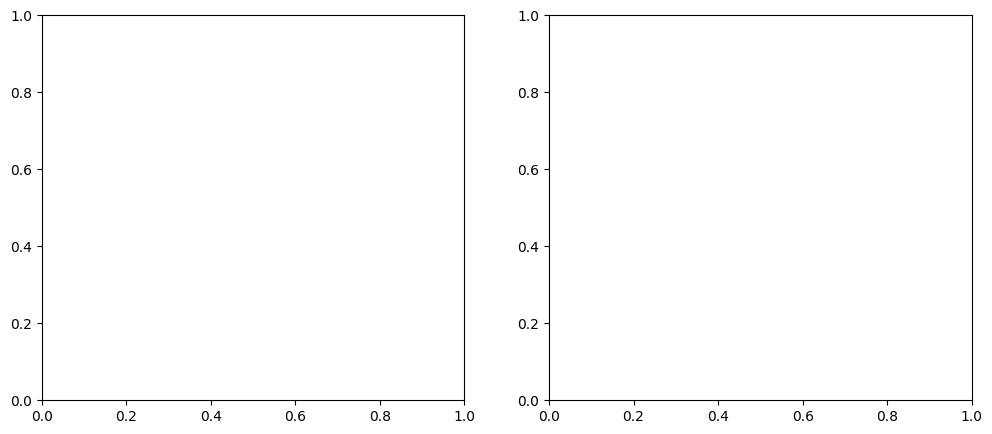

In [ ]:
fig, axes = plt.subplots(1, 2, figsize = (12, 5))


## add plotting code here



**3b)** Use the genextreme.fit() function to fit a GEV distribution for the 2015 data. Report the shape, location, and scale parameters.



In [ ]:
## fit GEV distribution for 2015 data



**3c)** Use the genextreme.fit() function to fit a GEV distribution for the 2100 data. Report the shape, location, and scale parameters.

In [ ]:
## fit GEV distribution for 2100 data



**3d)** Create a plot showing the GEV distributions for both time periods. You will need to use the genextreme.pdf() to calculate the pdf probabilities. Plot both distributions on the same figure so that you can more easily compare how they differ.

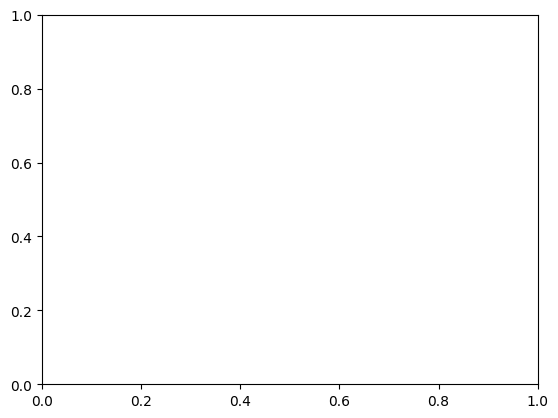

In [ ]:
## create figure showing GEV distribution for 2015 data and 2100 data

fig, ax = plt.subplots()

x = np.arange(0, 100, 1) ## plot the distribution over windspeed values ranging from 0 to over 100m/s


## add plotting code here





# remember to add axis labels, a title, and legend

**3e) Discussion:** How are the two distributions similar and/or different?

*add answer here*

**3f)** The code below lists return periods ranging from 1.1 years to 5,000 years. Use the genextreme.isf() function to calculate the magnitude of extreme hurricane wind events for each return period in the present climate and in 2100. Print out your results


In [ ]:
return_periods = np.array([2, 5, 10, 20, 30, 40, 50, 100, 200, 500, 1000])

In [ ]:
## add code here
## use as many code blocks as needed



Make a figure showing the size of the event vs. the return period for each climate. Show both distributions on the same figure to make it easier to compare:

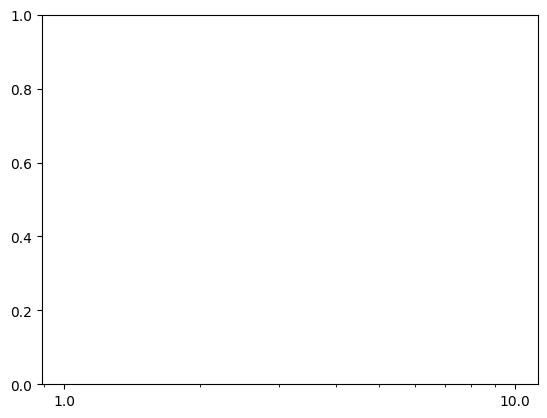

In [ ]:
## create figure showing the event size vs. return period
## show one line for 2015 and one line for 2100

fig, ax = plt.subplots()

## add plotting code here



## remember to add axis labels, title, and legend


## this code formats the x-axis labels in log scale
ax.set_xscale("log")
ax.xaxis.set_major_formatter(mticker.ScalarFormatter())
ax.ticklabel_format(style='plain', axis='x')

**3g)** Calculate the percent change in the event size between 2100 and 2015 for each return period. (For example, what is the percent change in the 1.01 year event between 2015 and 2100?). Print out your results.


In [ ]:
## add code here



Make a figure showing the return period on the x-axis and the percent change on the y-axis:

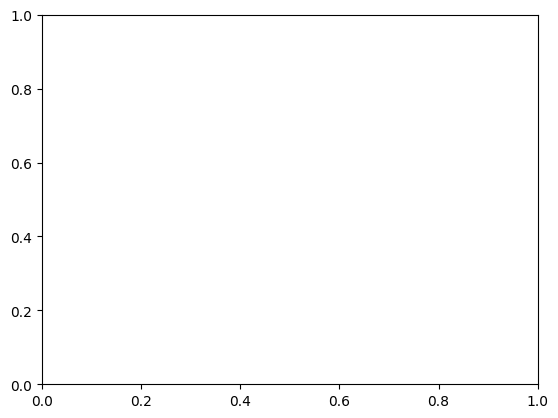

In [ ]:
## create a figure showing the percent change in the event size from 2015 to 2100 for each return period

fig, ax = plt.subplots()



## add plotting code here



**3h) Discussion:** Do the wind speeds increase or decrease in the future simulation compared to the present? By what approximate percent change?


*add answer here*

**3i) Discussion:** Why does climate change cause hurricane wind speeds to change? (You can base this off what we discuss in class, or do your own supplemental reading to answer this question)


*add answer here*